<a href="https://colab.research.google.com/github/Bitang-Melyen-Tanulok/Csip_Csip/blob/main/Marci_BirdCLEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/DeepLearning'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We don't use the eBird_Taxonomy_v2021.csv for teching the neural network.

The relevant data is contained by the SPECIES_CODE column - it shows the classes of our classification problem.

Later on, when we have the predictions of our neural network, we can assign the other rows to SPECIES_CODE based on this file.

In [ ]:
import pandas as pd

eBird_Taxonomy = pd.read_csv(path + '/eBird_Taxonomy_v2021.csv')

print("Number of classes: ", eBird_Taxonomy.shape[0])

eBird_Taxonomy.head()

Number of classes:  16753


,TAXON_ORDER,CATEGORY,SPECIES_CODE,PRIMARY_COM_NAME,SCI_NAME,ORDER1,FAMILY,SPECIES_GROUP,REPORT_AS
0,1,species,ostric2,Common Ostrich,Struthio camelus,Struthioniformes,Struthionidae (Ostriches),Ostriches,NaN
1,6,species,ostric3,Somali Ostrich,Struthio molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
2,7,slash,y00934,Common/Somali Ostrich,Struthio camelus/molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
3,8,species,grerhe1,Greater Rhea,Rhea americana,Rheiformes,Rheidae (Rheas),Rheas,NaN
4,14,species,lesrhe2,Lesser Rhea,Rhea pennata,Rheiformes,Rheidae (Rheas),NaN,NaN


The train_metadata.csv provides a wide range of metadata for the training.

The most relevant columns are primary_label, latitude and longitude. These show us, where the sound samples were recorded, and from this, we can make a prediction on where different species are indigenous.

In [ ]:
train_metadata = pd.read_csv(path + '/train_metadata.csv')

train_metadata.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,asbfly,[],['call'],39.2297,118.1987,Muscicapa dauurica,Asian Brown Flycatcher,Matt Slaymaker,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/134896,asbfly/XC134896.ogg
1,asbfly,[],['song'],51.4030,104.6401,Muscicapa dauurica,Asian Brown Flycatcher,Magnus Hellström,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/164848,asbfly/XC164848.ogg
2,asbfly,[],['song'],36.3319,127.3555,Muscicapa dauurica,Asian Brown Flycatcher,Stuart Fisher,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/175797,asbfly/XC175797.ogg
3,asbfly,[],['call'],21.1697,70.6005,Muscicapa dauurica,Asian Brown Flycatcher,vir joshi,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/207738,asbfly/XC207738.ogg
4,asbfly,[],['call'],15.5442,73.7733,Muscicapa dauurica,Asian Brown Flycatcher,Albert Lastukhin & Sergei Karpeev,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/209218,asbfly/XC209218.ogg


In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(train_metadata, lat='latitude', lon='longitude', color='common_name',
                        hover_name='primary_label', hover_data=['latitude', 'longitude'],
                        title='Geographical Distribution of Bird Species',
                        zoom=2, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

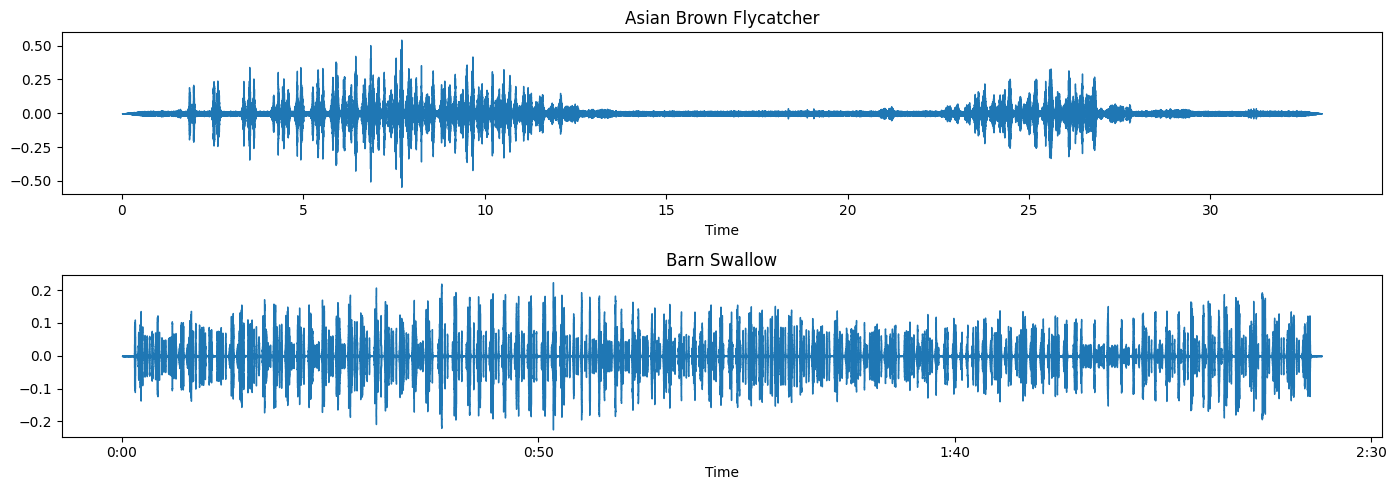

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
import matplotlib
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio

#Loading the first two audio files
audio1_data, audio1_rate = librosa.load(path+'/sample_train_audio/'+train_metadata.filename[710])
audio2_data, audio2_rate = librosa.load(path+'/sample_train_audio/'+train_metadata.filename[3207])

#Showing the two audio files
plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio1_data, sr=audio1_rate)
plt.title(train_metadata.common_name[0])

plt.subplot(2, 1, 2)
librosa.display.waveshow(audio2_data, sr=audio2_rate)
plt.title(train_metadata.common_name[1000])

plt.tight_layout()
plt.show()

# display(Audio(audio1_data[0, :audio1_rate*5], rate=audio1_rate))
# display(Audio(audio2_data[1, :audio2_rate*5], rate=audio2_rate))

Text(0.5, 1.0, "Blyth's Reed Warbler")

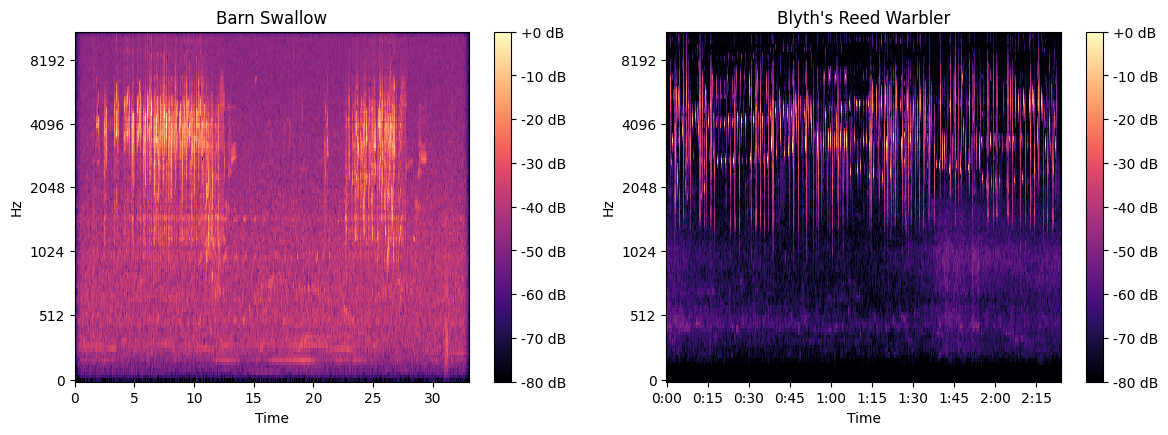

In [ ]:
import numpy as np

#Displaying the spectrograms for both audio files
plt.figure(figsize=(14, 10))

#Choose the first audio
plt.subplot(2, 2, 1)
S1 = librosa.feature.melspectrogram(y=audio1_data, sr=audio1_rate, n_mels=128)
S1_dB = librosa.power_to_db(S1, ref=np.max)
librosa.display.specshow(S1_dB, sr=audio1_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title(train_metadata.common_name[710])

#Choose the 1000th audio(just to make sure it's a different species)
plt.subplot(2, 2, 2)
S2 = librosa.feature.melspectrogram(y=audio2_data, sr=audio2_rate, n_mels=128)
S2_dB = librosa.power_to_db(S2, ref=np.max)
librosa.display.specshow(S2_dB, sr=audio2_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title(train_metadata.common_name[3207])

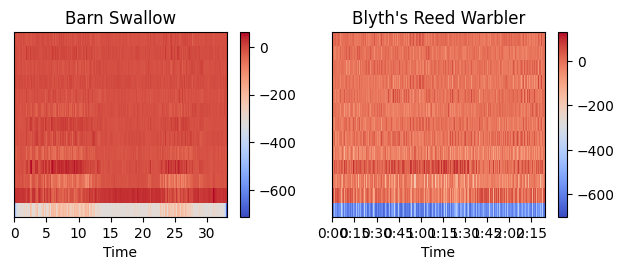

In [ ]:
#Displaying the spectrograms for both audio files

plt.subplot(2, 2, 3)
mfcc1 = librosa.feature.mfcc(y=audio1_data, sr=audio1_rate, n_mfcc=13)
librosa.display.specshow(mfcc1, x_axis='time')
plt.colorbar()
plt.title(train_metadata.common_name[710])

#Choose the 1000th audio(just to make sure it's a different species)
plt.subplot(2, 2, 4)
mfcc2 = librosa.feature.mfcc(y=audio2_data, sr=audio2_rate, n_mfcc=13)
librosa.display.specshow(mfcc2, x_axis='time')
plt.colorbar()
plt.title(train_metadata.common_name[3207])

plt.tight_layout()
plt.show()

# Hangadatok beolvasása és splitelése